### Bitset

In [ ]:
import random
import numpy as np

In [ ]:
class BitSet:
  def __init__(self, size):
    self.bits = np.full((1, size), False)

  def get(self, index):
    return self.bits[0, index]

  def set(self, index, value):
    self.bits[0, index] = value

  def flip(self, index):
    self.bits[0, index] = not self.bits[0, index]

  def debug(self):
    print(self.bits)

### Chromossome

In [ ]:
class Chromossome:
  def __init__(self):
    x = random.randint(-15, 15) # Fenótipo Base10
    y = random.randint(-15, 15) # Fenótipo Base10

    self.__genes = Chromossome.get_genotype(x, y)

  @staticmethod
  def get_genotype(x, y):
    bits = BitSet(10)

    xy_binary = "{:05b}".format(x) + "{:05b}".format(y)

    for i in range(10):
      bits.set(i, xy_binary[i] == '1')

    return bits

  @staticmethod
  def get_fenotype(genes):
    # xxxxx yyyyy (genótipo)
    # 01234 56789 (indices)
    # 8421S 8421S (s == 0 -> Positivo; s == 1 -> Negativo)

    x = (8 * genes.get(0) +
         4 * genes.get(1) +
         2 * genes.get(2) +
         1 * genes.get(3))
    
    if genes.get(4) == 1:
      x *= -1

    y = (8 * genes.get(5) +
         4 * genes.get(6) +
         2 * genes.get(7) +
         1 * genes.get(8))
    
    if genes.get(9) == 1:
      y *= -1

    return x, y

  def get_genes(self):
    return self.__genes

  def set_genes(self, genes):
    self.__genes = genes

  def to_string(self):
    chr_str = "G = ["

    for i in range(10):
      if i == 5:
        chr_str += " "

      chr_str += "1" if self.__genes.get(i) else "0"

    x, y = Chromossome.get_fenotype(self.__genes)

    chr_str += f"], F = [{x}, {y}]"
    return chr_str

### Problem

In [ ]:
class Problem:
  @staticmethod
  def f(x, y):
    return x**2 + y**2

  @staticmethod
  def g(x, y):
    return 1 / (1 + Problem.f(x, y))

  @staticmethod
  def f_chromossome(chromossome):
    genes = chromossome.get_genes()
    x, y = Chromossome.get_fenotype(genes)
    return Problem.f(x, y)

  @staticmethod
  def g_chromossome(chromossome):
    genes = chromossome.get_genes()
    x, y = Chromossome.get_fenotype(genes)
    return Problem.g(x, y)

  @staticmethod
  def f_average(population):
    sum = 0
    for i in population:
      sum += Problem.f_chromossome(i)

    return sum / len(population) 

  @staticmethod
  def g_average(population):
    sum = 0
    for i in population:
      sum += Problem.g_chromossome(i)

    return sum / len(population) 

### Utils

In [ ]:
class GeneticUtils:
  @staticmethod
  def find_best_chromossome(population):
    best_chromossome = None

    for chromossome in population:
      score = Problem.g_chromossome(chromossome)

      if best_chromossome is None or score > Problem.g_chromossome(best_chromossome):
        best_chromossome = chromossome

    return best_chromossome

  @staticmethod
  def find_worst_chromossome(population):
    worst_chromossome = None

    for chromossome in population:
      score = Problem.g_chromossome(chromossome)

      if worst_chromossome is None or score < Problem.g_chromossome(worst_chromossome):
        worst_chromossome = chromossome

    return worst_chromossome

  @staticmethod
  def format_chromossome(chromossome):
    return f"{chromossome.to_string()}, Score = {Problem.g_chromossome(chromossome):.3f}"

Genetic Operations

In [ ]:
class GeneticOperators:

  MUTATION_PROBABILITY = 0.05

  @staticmethod
  def selection(population):
    parent1 = random.choice(population)
    parent2 = random.choice(population)

    while parent1 is parent2:
      parent1 = random.choice(population)
      parent2 = random.choice(population)

    print(f"1st parent chosen for crossover: {GeneticUtils.format_chromossome(parent1)}")
    print(f"2nd parent chosen for crossover: {GeneticUtils.format_chromossome(parent2)}")

    return parent1, parent2

  @staticmethod
  def crossover(population, parent1, parent2):
    crossover_point = random.randint(1, 9)
    print(f"Crossover will happen at point {crossover_point}")

    parent1_genes = parent1.get_genes()
    parent2_genes = parent2.get_genes()

    child1_genes = BitSet(10)
    child2_genes = BitSet(10)

    for i in range(0, crossover_point):
      child1_genes.set(i, parent1_genes.get(i))
      child2_genes.set(i, parent2_genes.get(i))

    for i in range(crossover_point, 10):
      child1_genes.set(i, parent2_genes.get(i))
      child2_genes.set(i, parent1_genes.get(i))

    child1 = Chromossome()
    child2 = Chromossome()

    child1.set_genes(child1_genes)
    child2.set_genes(child2_genes)

    print(f"1st child generated from crossover: {GeneticUtils.format_chromossome(child1)}")
    print(f"2nd child generated from crossover: {GeneticUtils.format_chromossome(child2)}")

    population.append(child1)
    population.append(child2)

  @staticmethod
  def elitism(population):
    for _ in range(2):
      worst_individual = GeneticUtils.find_worst_chromossome(population)
      population.remove(worst_individual)
      print(f"Removing worst individual from population: {GeneticUtils.format_chromossome(worst_individual)}")

  @staticmethod
  def mutation(population):
    prob = random.uniform(0, 1)

    if prob >= GeneticOperators.MUTATION_PROBABILITY:
      return

    target = random.choice(population)
    mutation_point = random.randint(0, 9)
    print(f"Individual {target.to_string()} will mutate at point{mutation_point}")

    genes = target.get_genes()
    genes.flip(mutation_point)

### Main

1st parent chosen for crossover: G = [01011 00001], F = [-5, 0], Score = 0.038
2nd parent chosen for crossover: G = [01100 01011], F = [6, -5], Score = 0.016
Crossover will happen at point 8
1st child generated from crossover: G = [01011 00011], F = [-5, -1], Score = 0.037
2nd child generated from crossover: G = [01100 01001], F = [6, -4], Score = 0.019
Removing worst individual from population: G = [01010 01111], F = [5, -7], Score = 0.013
Removing worst individual from population: G = [01101 01100], F = [-6, 6], Score = 0.014
Generation #1 -> Average population score = 0.039


1st parent chosen for crossover: G = [01011 00001], F = [-5, 0], Score = 0.038
2nd parent chosen for crossover: G = [01000 01101], F = [4, -6], Score = 0.019
Crossover will happen at point 1
1st child generated from crossover: G = [01000 01101], F = [4, -6], Score = 0.019
2nd child generated from crossover: G = [01011 00001], F = [-5, 0], Score = 0.038
Removing worst individual from population: G = [01100 01011

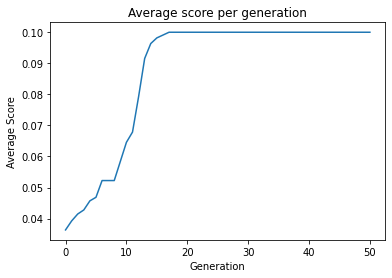

In [ ]:
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # População inicial
  population = []
  for _ in range(10):
    population.append(Chromossome())

  generation = 0
  population_score = Problem.g_average(population)

  # Variaveis auxiliares para o plot
  generation_plot = [generation]
  population_score_plot = [population_score]

  # Executando as iterações
  while generation < 50:
    parent1, parent2 = GeneticOperators.selection(population)

    GeneticOperators.crossover(population, parent1, parent2)
    GeneticOperators.mutation(population)
    GeneticOperators.elitism(population)

    generation += 1
    population_score = Problem.g_average(population)

    generation_plot.append(generation)
    population_score_plot.append(population_score)

    print(f"Generation #{generation} -> Average population score = {population_score:.3f}\n\n")

  best_chromossome = GeneticUtils.find_best_chromossome(population)
  print(f"Best individual: {GeneticUtils.format_chromossome(best_chromossome)}")

  plt.gca().set_xlabel("Generation")
  plt.gca().set_ylabel("Average Score")
  plt.gca().set_title("Average score per generation")

  plt.plot(generation_plot, population_score_plot)
  plt.show()
